In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

plt.rcParams['figure.figsize'] = (16, 8)

# Load Data

In [24]:
df = pd.read_csv('/content/tb_sig_5.csv')
df['timestamp'] = df['created_date'] + " " + df["created_time"]
df.drop(columns=["created_date", "created_time"], inplace=True)
print(f"Bentuk data: {df.shape}")
df.head()

Bentuk data: (40, 23)


,id,sp_heater_ctr_cross_left,sp_heater_ctr_cross_right,sp_heater_ctr_long_left,sp_heater_ctr_long_right,sp_dosing_1,sp_dosing_2,sp_dosing_3,sp_dosing_4,sp_dosing_5,...,sp_dosing_1_8,actual_dosing_1,actual_dosing_2,actual_dosing_3,actual_dosing_4,actual_dosing_5,actual_dosing_6,actual_dosing_7,actual_dosing_8,timestamp
0,1,188,188,130,130,3380,3310,3530,3500,3300,...,3750,3380,3310,3530,3500,3300,3530,3340,3440,2025-03-05 16:17:40
1,2,188,188,130,130,3380,3310,3530,3500,3300,...,3750,3380,3310,3530,3500,3300,3530,3340,3440,2025-03-05 17:17:40
2,3,188,188,130,130,3390,3320,3540,3510,3310,...,3760,3390,3320,3540,3510,3310,3540,3350,3450,2025-03-05 18:17:40
3,4,188,188,130,130,3390,3320,3540,3510,3310,...,3760,3390,3320,3540,3510,3310,3540,3350,3450,2025-03-05 19:17:40
4,5,188,188,130,130,3390,3320,3540,3510,3310,...,3760,3390,3320,3540,3510,3310,3540,3350,3450,2025-03-05 20:17:40


In [25]:
df.describe()

,id,sp_heater_ctr_cross_left,sp_heater_ctr_cross_right,sp_heater_ctr_long_left,sp_heater_ctr_long_right,sp_dosing_1,sp_dosing_2,sp_dosing_3,sp_dosing_4,sp_dosing_5,...,sp_dosing_8,sp_dosing_1_8,actual_dosing_1,actual_dosing_2,actual_dosing_3,actual_dosing_4,actual_dosing_5,actual_dosing_6,actual_dosing_7,actual_dosing_8
count,40.000000,40.0,40.0,40.0,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,20.500000,188.0,188.0,130.0,130.0,3311.250000,3247.250000,3483.250000,3431.250000,3237.250000,...,3375.250000,3689.250000,3311.250000,3247.250000,3483.250000,3431.250000,3237.250000,3449.25000,3271.250000,3375.250000
std,11.690452,0.0,0.0,0.0,0.0,47.078086,43.085336,28.679261,47.078086,38.563135,...,42.666717,38.389869,47.078086,43.085336,28.679261,47.078086,38.563135,55.53412,47.078086,42.666717
min,1.000000,188.0,188.0,130.0,130.0,3250.000000,3190.000000,3450.000000,3370.000000,3190.000000,...,3320.000000,3640.000000,3250.000000,3190.000000,3450.000000,3370.000000,3190.000000,3380.00000,3210.000000,3320.000000
25%,10.750000,188.0,188.0,130.0,130.0,3260.000000,3200.000000,3457.500000,3380.000000,3200.000000,...,3330.000000,3650.000000,3260.000000,3200.000000,3457.500000,3380.000000,3200.000000,3390.00000,3220.000000,3330.000000
50%,20.500000,188.0,188.0,130.0,130.0,3320.000000,3260.000000,3480.000000,3440.000000,3230.000000,...,3380.000000,3690.000000,3320.000000,3260.000000,3480.000000,3440.000000,3230.000000,3450.00000,3280.000000,3380.000000
75%,30.250000,188.0,188.0,130.0,130.0,3350.000000,3280.000000,3500.000000,3470.000000,3270.000000,...,3410.000000,3720.000000,3350.000000,3280.000000,3500.000000,3470.000000,3270.000000,3500.00000,3310.000000,3410.000000
max,40.000000,188.0,188.0,130.0,130.0,3390.000000,3320.000000,3540.000000,3510.000000,3310.000000,...,3450.000000,3760.000000,3390.000000,3320.000000,3540.000000,3510.000000,3310.000000,3540.00000,3350.000000,3450.000000


# Visualization

## Set Poin vs Actual

### Dosing

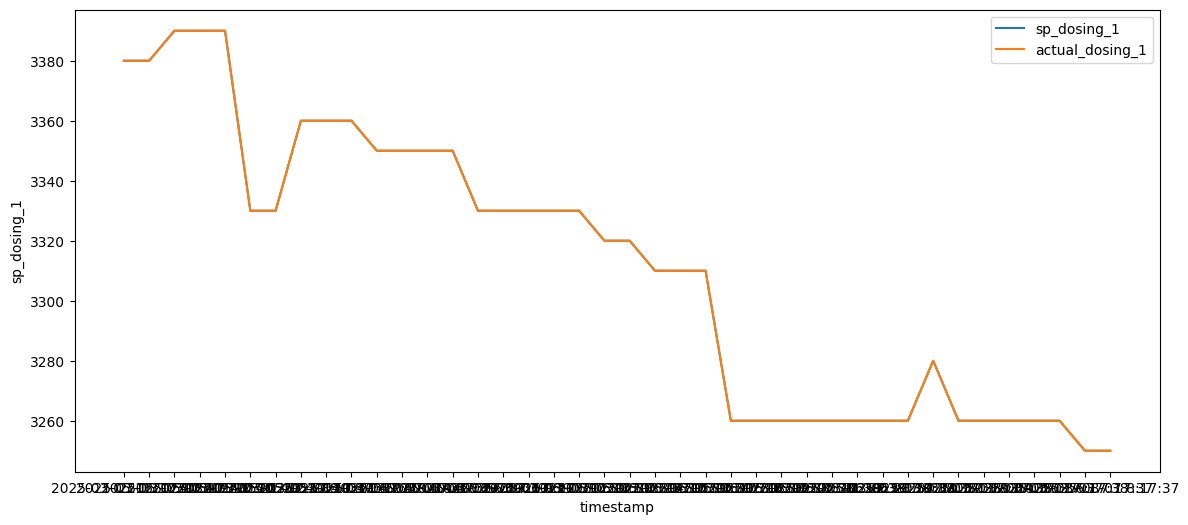

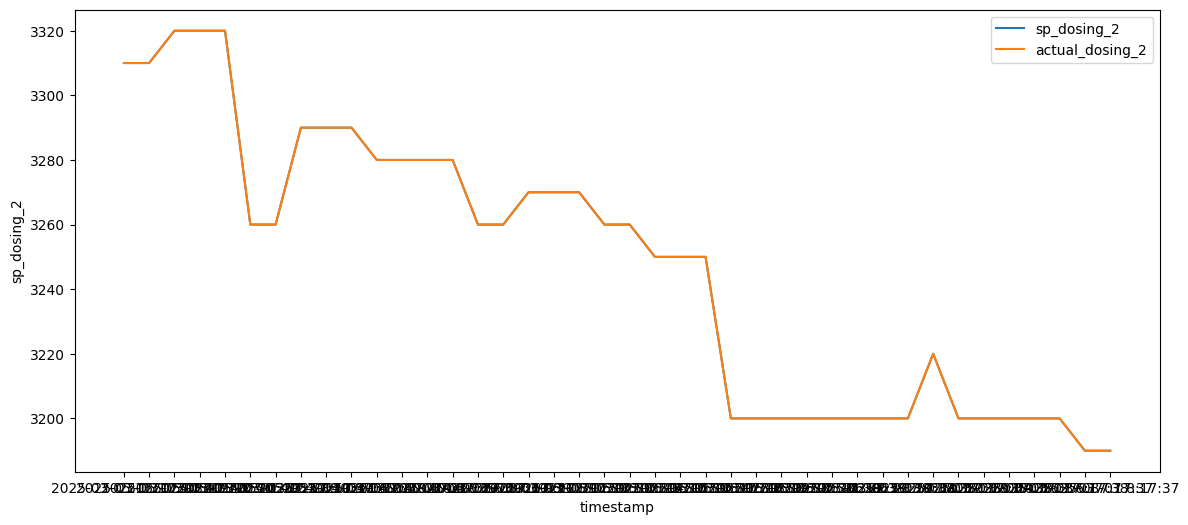

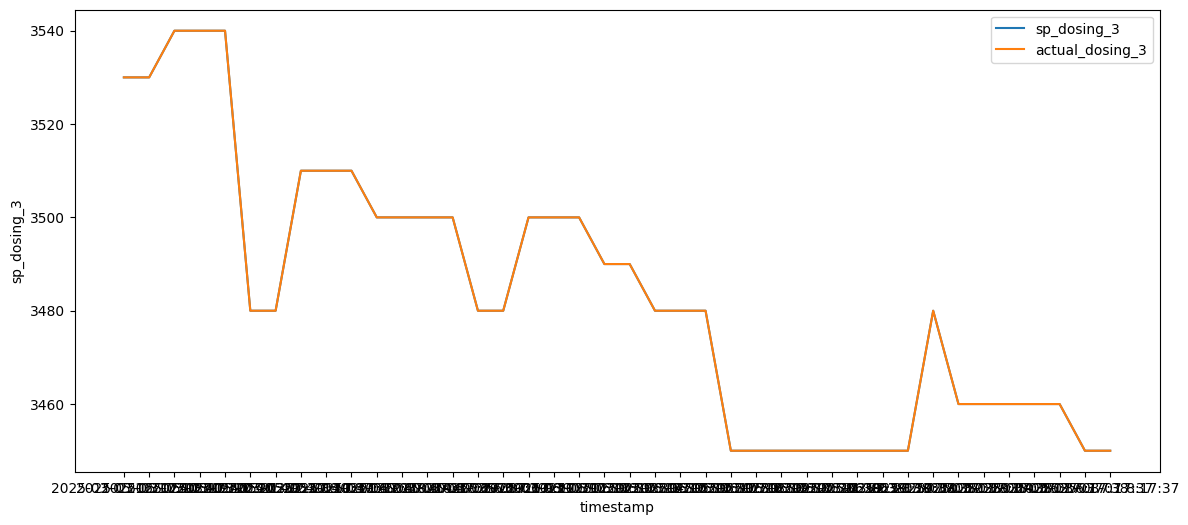

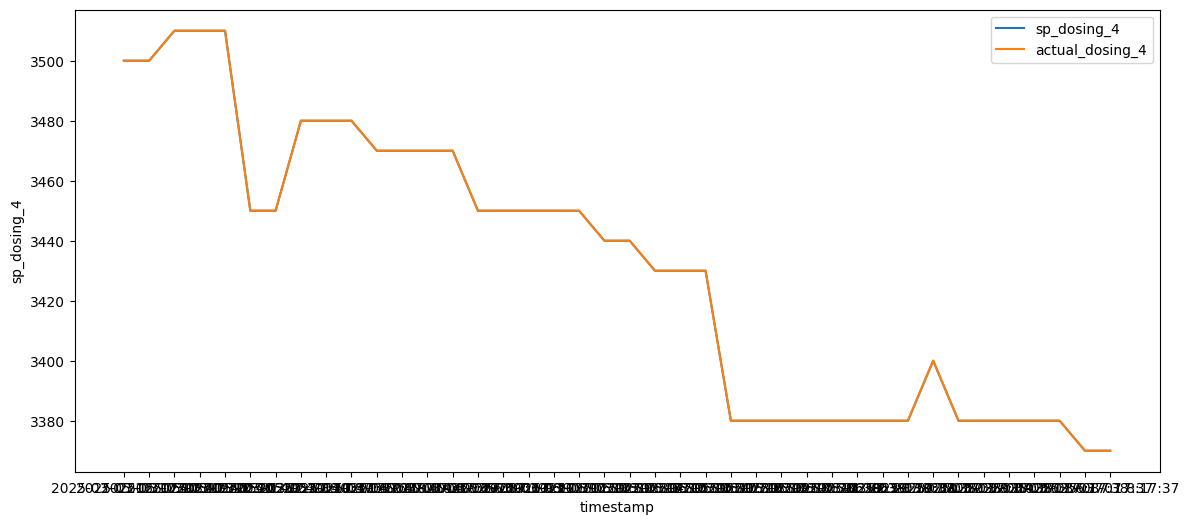

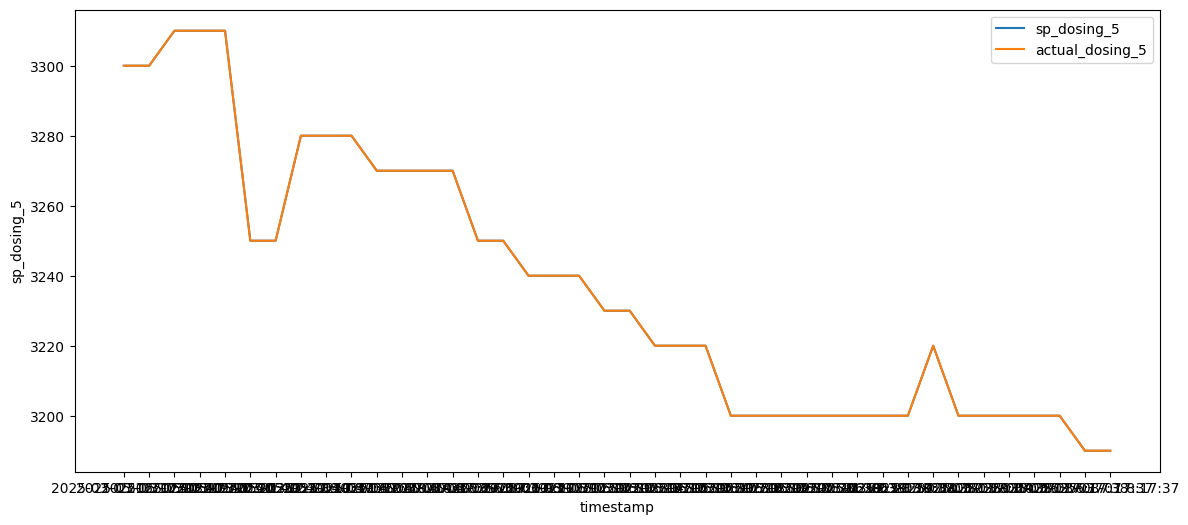

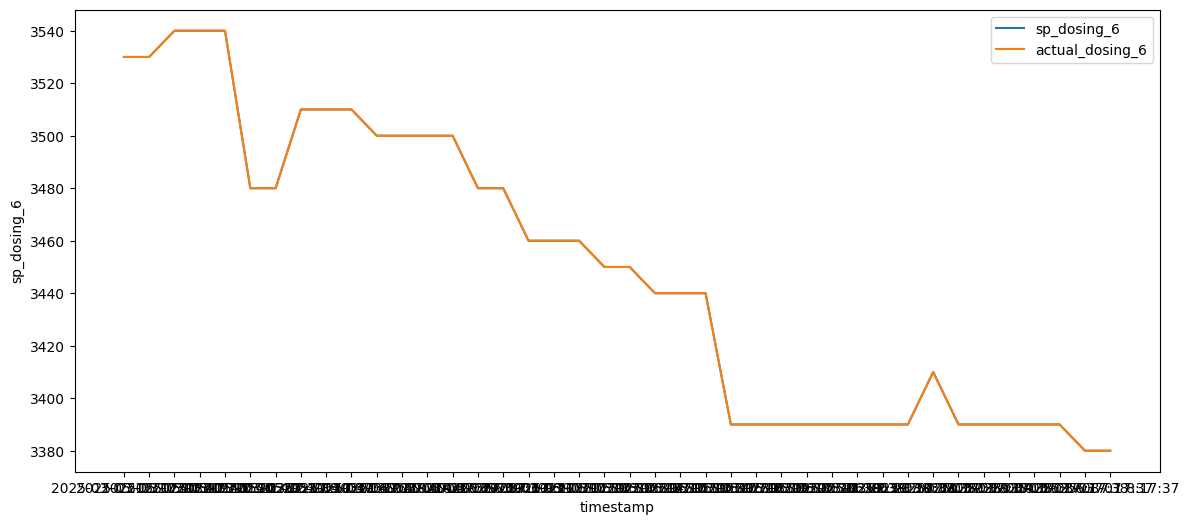

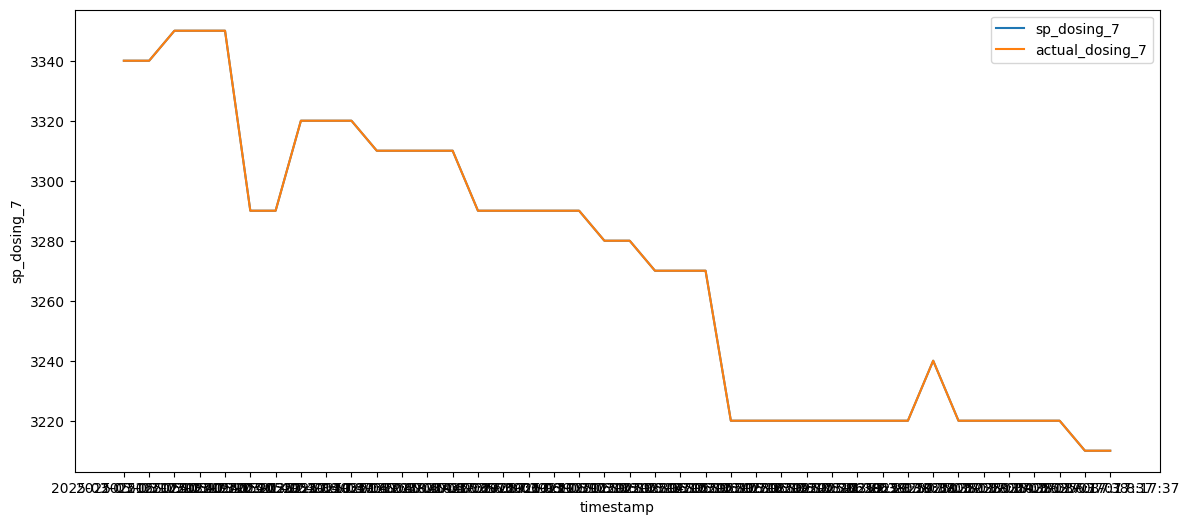

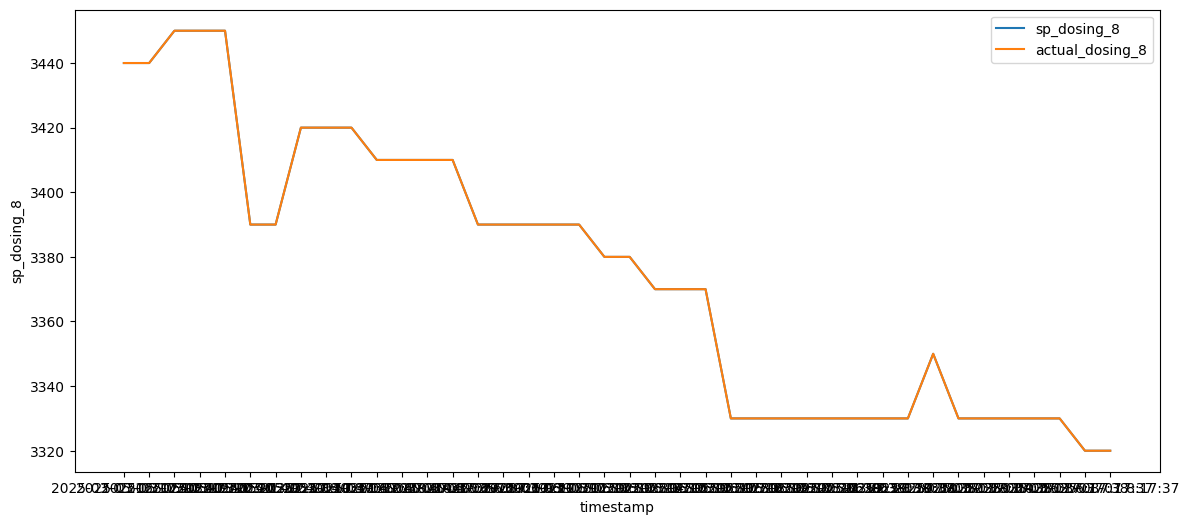

In [26]:
dosing_1 = ["sp_dosing_1", "actual_dosing_1"]
dosing_2 = ["sp_dosing_2", "actual_dosing_2"]
dosing_3 = ["sp_dosing_3", "actual_dosing_3"]
dosing_4 = ["sp_dosing_4", "actual_dosing_4"]
dosing_5 = ["sp_dosing_5", "actual_dosing_5"]
dosing_6 = ["sp_dosing_6", "actual_dosing_6"]
dosing_7 = ["sp_dosing_7", "actual_dosing_7"]
dosing_8 = ["sp_dosing_8", "actual_dosing_8"]

for col in [dosing_1, dosing_2, dosing_3, dosing_4, dosing_5, dosing_6, dosing_7, dosing_8]:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df, x="timestamp", y=col[0], label=col[0])
    sns.lineplot(data=df, x="timestamp", y=col[1], label=col[1])
    plt.legend()

### Heater

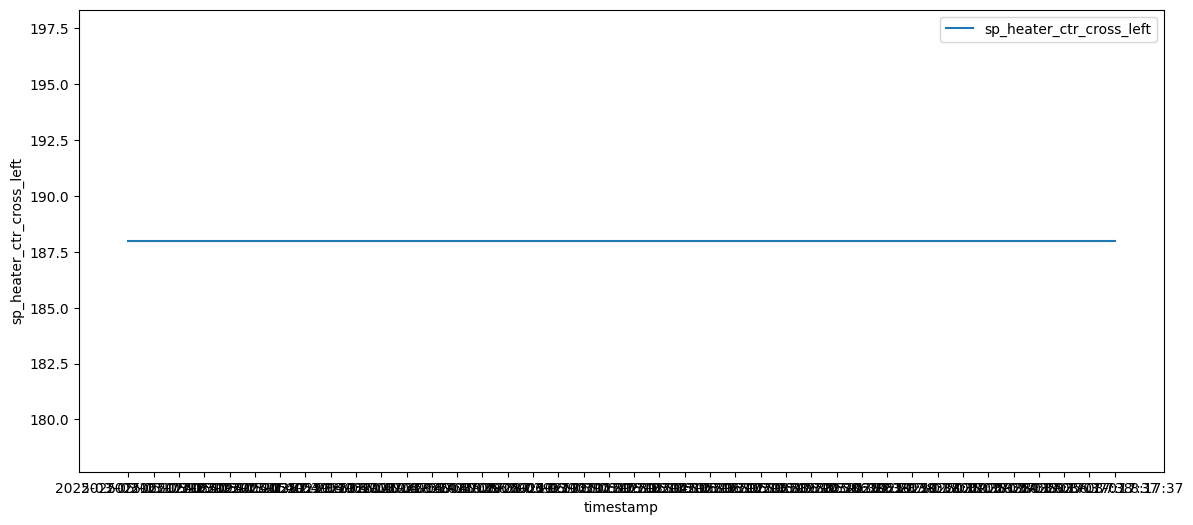

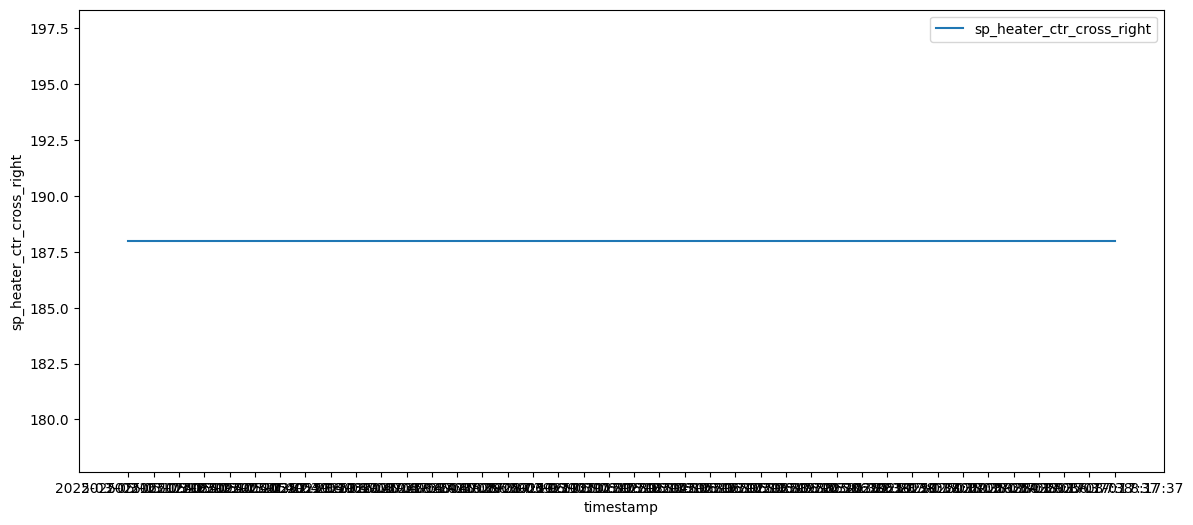

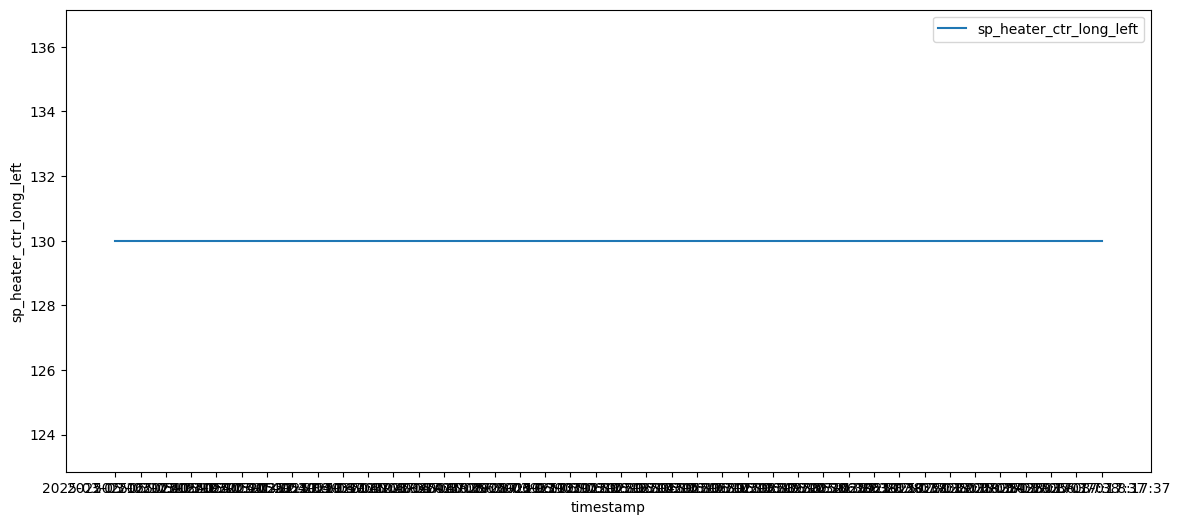

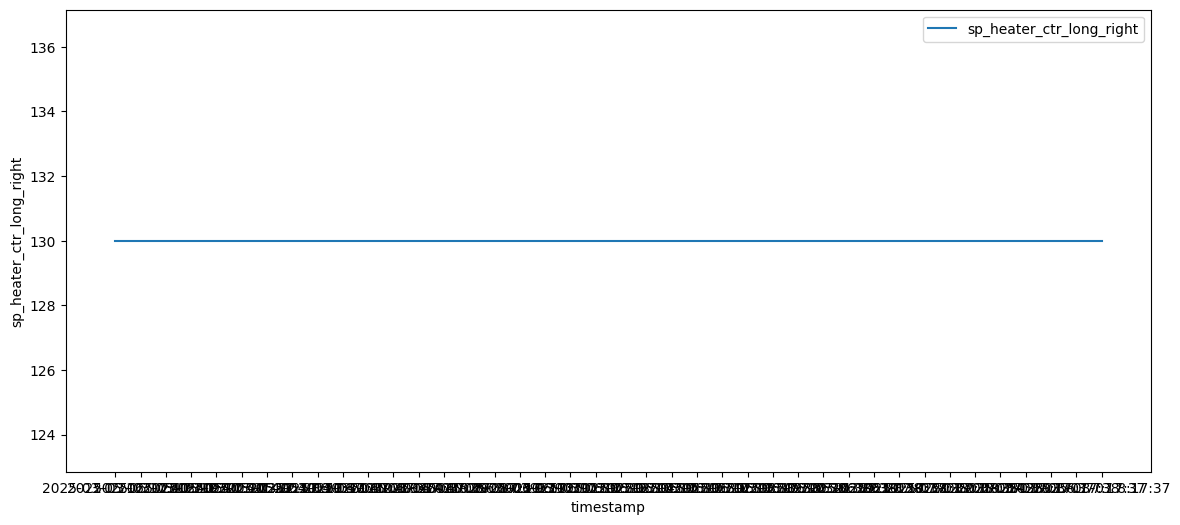

In [27]:
heater = ['sp_heater_ctr_cross_left', 'sp_heater_ctr_cross_right', 'sp_heater_ctr_long_left', 'sp_heater_ctr_long_right']
for col in heater:
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df, x="timestamp", y=col, label=col)
    plt.legend()

# Preprocessing Data

In [28]:
def convert_to_numeric(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col])
                # Konversi datetime ke timestamp (float)
                df[col] = df[col].apply(lambda x: x.timestamp())
            except Exception as e:
                try:
                    df[col] = pd.to_numeric(df[col])
                except Exception as e:
                    print(f"Dropping column '{col}' karena tidak bisa dikonversi ke numeric.")
                    df.drop(col, axis=1, inplace=True)
    return df

df = convert_to_numeric(df)


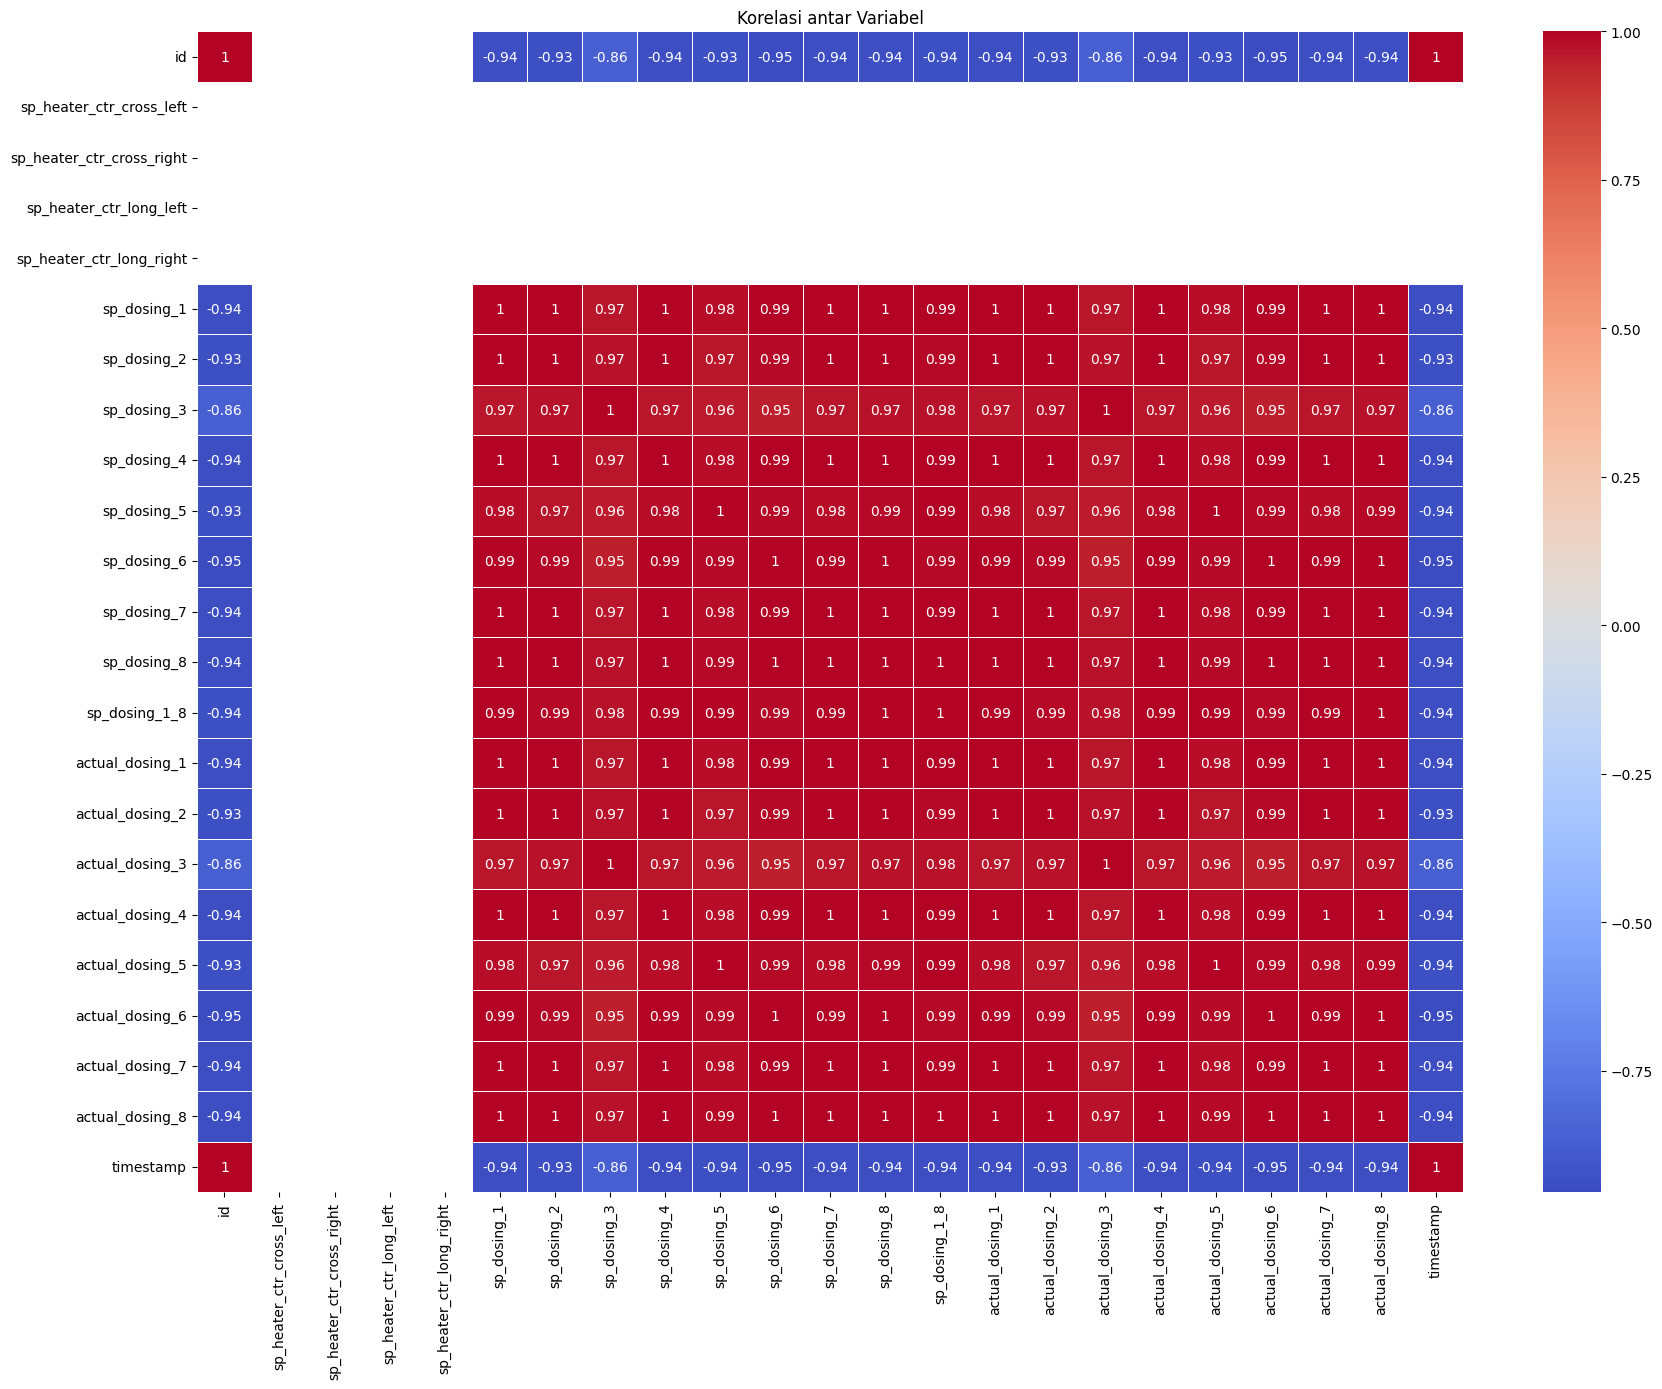

In [29]:
# Visualisasi korelasi data
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Variabel')
plt.tight_layout()
plt.show();

# Features Selection

In [30]:
# Memilih fitur yang akan digunakan - menghilangkan kolom non-numerik dan identifier
features = df.columns.drop(['id', 'timestamp'])
X = df[features]

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test Split

In [31]:
X_train, X_val = train_test_split(X_scaled, test_size=0.2, random_state=42)

print(f"Bentuk training set: {X_train.shape}")
print(f"Bentuk validation set: {X_val.shape}")

Bentuk training set: (32, 21)
Bentuk validation set: (8, 21)


# Config

In [32]:
# Mendapatkan dimensi input
input_dim = X_train.shape[1]

# Parameter model
encoding_dim = 10  # Hidden Layer Dimension
epochs = 128
batch_size = 8

# Model - AutoEncoder

In [33]:
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(32, activation='relu')(input_layer)
encoder = Dense(encoding_dim, activation='relu')(encoder)

# Decoder
decoder = Dense(32, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Model AutoEncoder lengkap
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Kompilasi model
autoencoder.compile(optimizer='adam', loss='mse')

# Ringkasan model
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 21)                  │             693 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,079 (8.12 KB)

 Trainable params: 2,079 (8.12 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

Epoch 1/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.1365 - val_loss: 0.1339
Epoch 2/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.1417 - val_loss: 0.1313
Epoch 3/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1382 - val_loss: 0.1289
Epoch 4/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1325 - val_loss: 0.1265
Epoch 5/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1274 - val_loss: 0.1241
Epoch 6/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1268 - val_loss: 0.1215
Epoch 7/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1262 - val_loss: 0.1190
Epoch 8/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1265 - val_loss: 0.1163
Epoch 9/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1097 - val_loss: 0.1135
Epoch 10/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1168 - val_loss: 0.1107
Epoch 11/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1120 - val_loss: 0.1077
Epoch 12/128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1164 - val_l

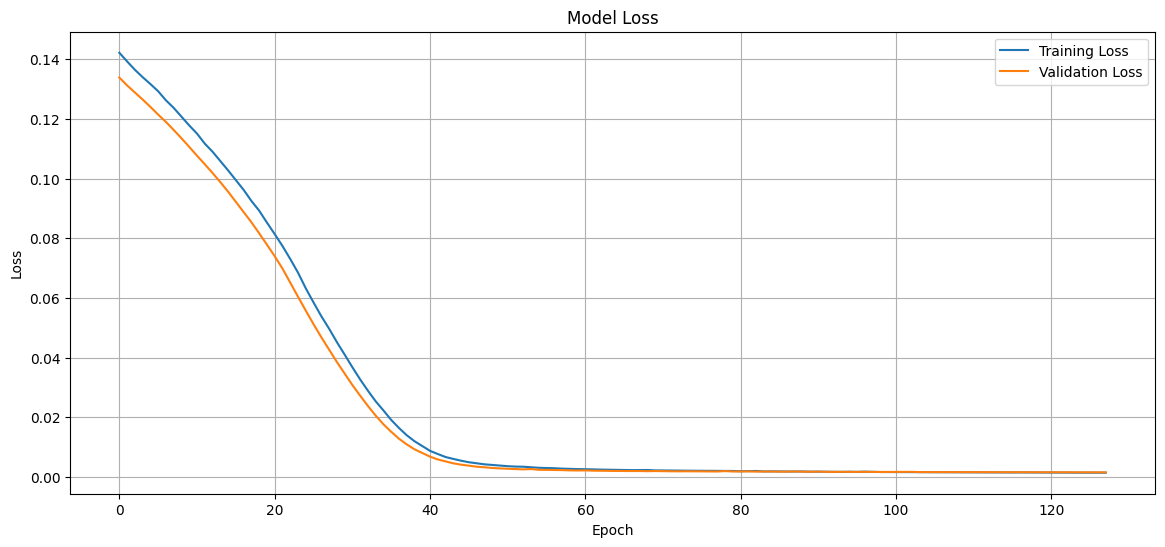

In [34]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True
)
history = autoencoder.fit(
    X_train, X_train,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_val, X_val),
    callbacks=[early_stopping],
    verbose=1
)

# Plot loss history
plt.figure(figsize=(14, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


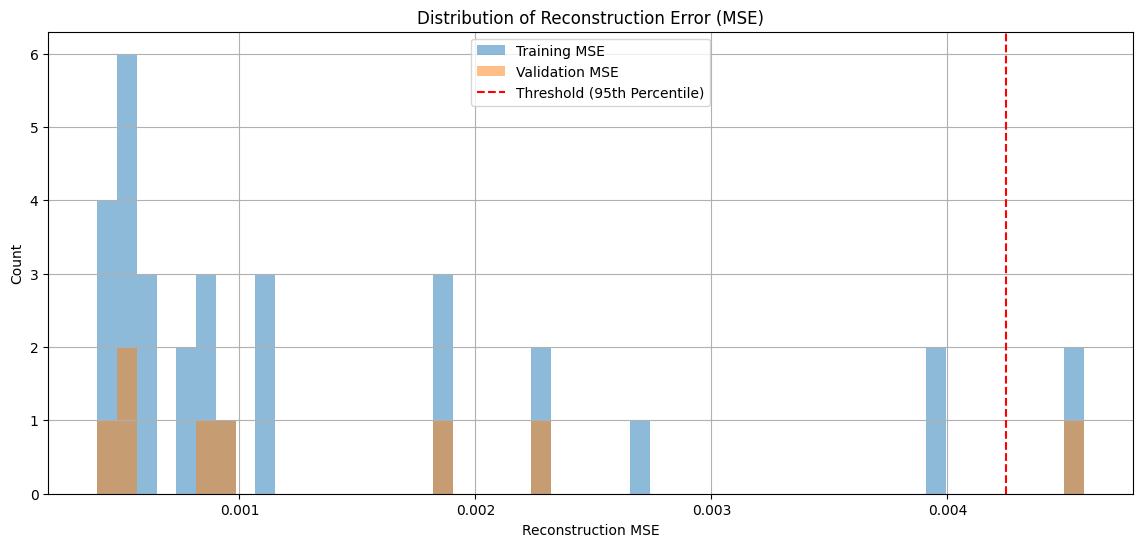

In [35]:
X_pred_train = autoencoder.predict(X_train)
X_pred_val = autoencoder.predict(X_val)

# Menghitung Mean Squared Error (MSE) untuk setiap sampel
mse_train = np.mean(np.power(X_train - X_pred_train, 2), axis=1)
mse_val = np.mean(np.power(X_val - X_pred_val, 2), axis=1)

# Visualisasi MSE
plt.figure(figsize=(14, 6))
plt.hist(mse_train, bins=50, alpha=0.5, label='Training MSE')
plt.hist(mse_val, bins=50, alpha=0.5, label='Validation MSE')
plt.axvline(x=np.percentile(mse_train, 95), color='r', linestyle='--', label='Threshold (95th Percentile)')
plt.title('Distribution of Reconstruction Error (MSE)')
plt.xlabel('Reconstruction MSE')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# Set Threshold and Identify the Anomaly

In [36]:
threshold = np.percentile(mse_train, 95)
print(f"Threshold MSE (95th percentile): {threshold:.6f}")

# Menerapkan model ke seluruh dataset
X_pred_full = autoencoder.predict(X_scaled)
mse_full = np.mean(np.power(X_scaled - X_pred_full, 2), axis=1)

# Mengidentifikasi anomali
df['reconstruction_error'] = mse_full
df['is_anomaly'] = df['reconstruction_error'] > threshold

# Menampilkan jumlah anomali yang terdeteksi
anomaly_count = df['is_anomaly'].sum()
print(f"Jumlah anomali terdeteksi: {anomaly_count} dari {df.shape[0]} sampel ({(anomaly_count/df.shape[0])*100:.2f}%)")


Threshold MSE (95th percentile): 0.004248
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Jumlah anomali terdeteksi: 3 dari 40 sampel (7.50%)


# Visualize Recontruction Error and Threshold

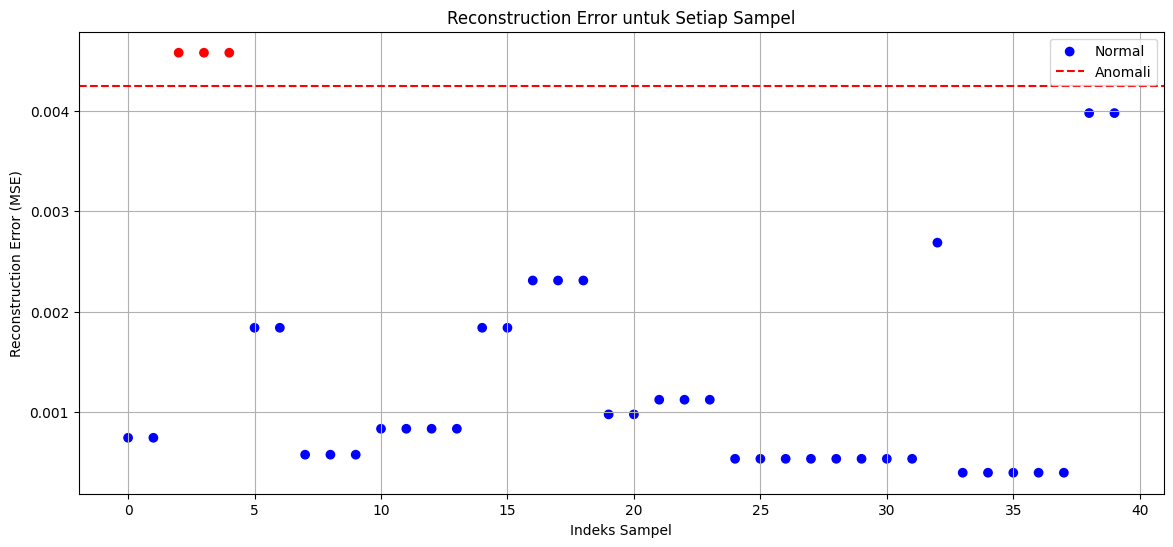

In [37]:
plt.figure(figsize=(14, 6))
plt.scatter(range(len(df)), df['reconstruction_error'], c=df['is_anomaly'].map({True: 'red', False: 'blue'}))
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold:.6f}')
plt.title('Reconstruction Error untuk Setiap Sampel')
plt.ylabel('Reconstruction Error (MSE)')
plt.xlabel('Indeks Sampel')
plt.legend(['Normal', 'Anomali', 'Threshold'])
plt.grid(True)
plt.show()

In [38]:
# Menunjukkan data anomali
print("\nData anomali terdeteksi:")
df[df['is_anomaly'] == True][['id', 'timestamp'] + list(features) + ['reconstruction_error']]


Data anomali terdeteksi:


,id,timestamp,sp_heater_ctr_cross_left,sp_heater_ctr_cross_right,sp_heater_ctr_long_left,sp_heater_ctr_long_right,sp_dosing_1,sp_dosing_2,sp_dosing_3,sp_dosing_4,...,sp_dosing_1_8,actual_dosing_1,actual_dosing_2,actual_dosing_3,actual_dosing_4,actual_dosing_5,actual_dosing_6,actual_dosing_7,actual_dosing_8,reconstruction_error
2,3,1.741199e+09,188,188,130,130,3390,3320,3540,3510,...,3760,3390,3320,3540,3510,3310,3540,3350,3450,0.004578
3,4,1.741202e+09,188,188,130,130,3390,3320,3540,3510,...,3760,3390,3320,3540,3510,3310,3540,3350,3450,0.004578
4,5,1.741206e+09,188,188,130,130,3390,3320,3540,3510,...,3760,3390,3320,3540,3510,3310,3540,3350,3450,0.004578


# Features Importance

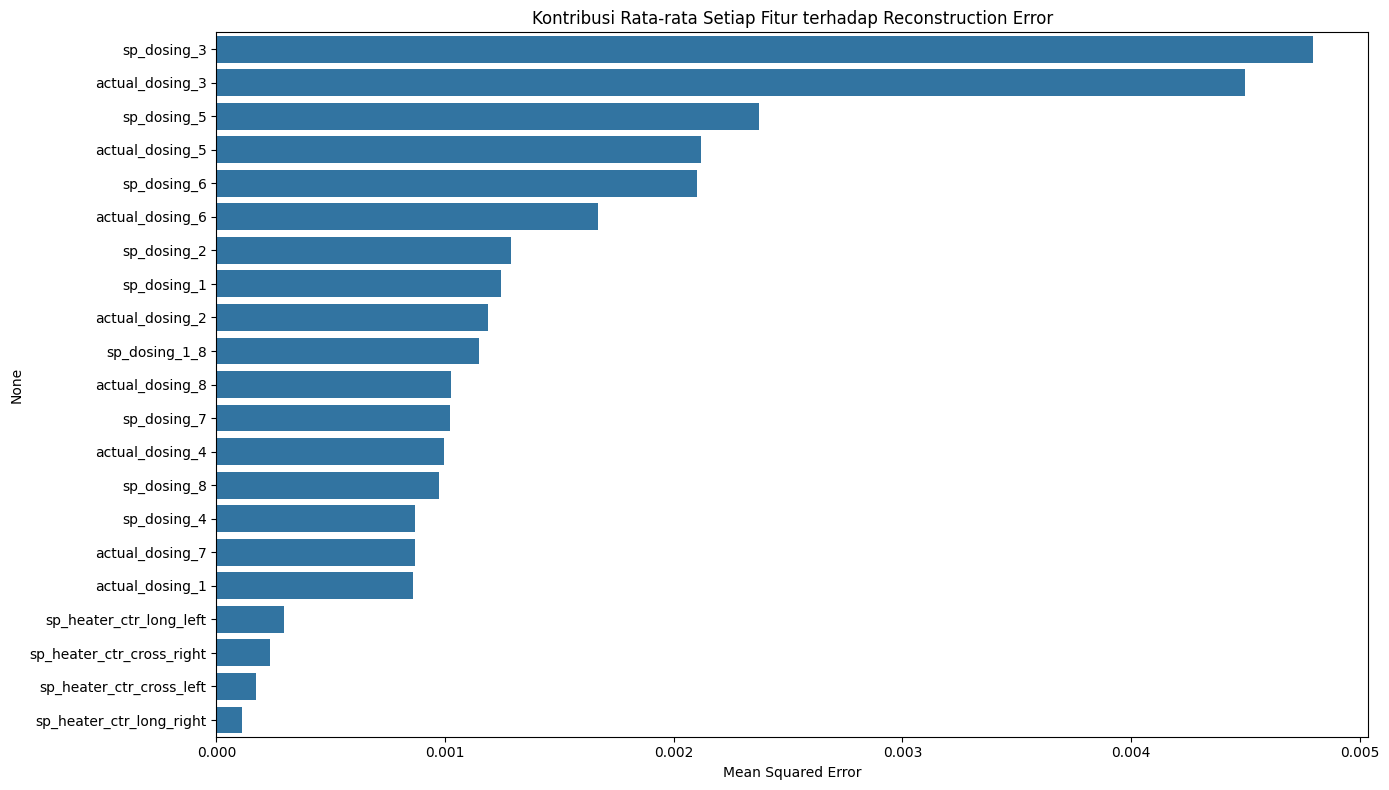

In [39]:
feature_errors = pd.DataFrame()

for i, feature in enumerate(features):
    feature_errors[feature] = np.power(X_scaled - X_pred_full, 2)[:, i]

# Menghitung kontribusi rata-rata setiap fitur terhadap error
feature_error_mean = feature_errors.mean().sort_values(ascending=False)

# Visualisasi kontribusi fitur terhadap error
plt.figure(figsize=(14, 8))
sns.barplot(x=feature_error_mean.values, y=feature_error_mean.index)
plt.title('Kontribusi Rata-rata Setiap Fitur terhadap Reconstruction Error')
plt.xlabel('Mean Squared Error')
plt.tight_layout()
plt.show()

# Save Model

In [40]:
autoencoder.save('anomaly_autoencoder_model.h5')

import joblib
joblib.dump(scaler, 'anomaly_scaler.pkl')

['anomaly_scaler.pkl']

# Main Function
Fungsi untuk mendeteksi Anomali pada data baru

In [41]:
def detect_anomalies(new_data, model, scaler, threshold):
    # Preprocessing
    if isinstance(new_data, pd.DataFrame):
        if all(feature in new_data.columns for feature in features):
            X_new = new_data[features]
        else:
            raise ValueError("Data baru tidak memiliki kolom yang sama dengan data training")
    else:
        X_new = new_data

    # Normalisasi
    X_new_scaled = scaler.transform(X_new)

    # Prediksi
    X_new_pred = model.predict(X_new_scaled)

    # Hitung rekonstruksi error
    mse_new = np.mean(np.power(X_new_scaled - X_new_pred, 2), axis=1)

    # Tambahkan kolom rekonstruksi error dan flag anomali
    if isinstance(new_data, pd.DataFrame):
        new_data = new_data.copy()
        new_data['reconstruction_error'] = mse_new
        new_data['is_anomaly'] = mse_new > threshold

    return new_data

# EXAMPLE USAGE:
# new_df = pd.read_csv('new_data.csv')
# results = detect_anomalies(new_df, autoencoder, scaler, threshold)
# anomalies = results[results['is_anomaly'] == True]